In [13]:
%reload_ext autoreload
%autoreload 2

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [46]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [13]:
pout(ans)

Rodoma 5 eilutės iš 6
|     Samsung      |      36290       |     30.4927      |
|      Nokia       |      35186       |     29.5651      |
|    BlackBerry    |       7161       |      6.0170      |
|        LG        |       5194       |      4.3643      |
|   SonyEricsson   |       4090       |      3.4366      |
|      Others      |      31091       |     26.1243      |


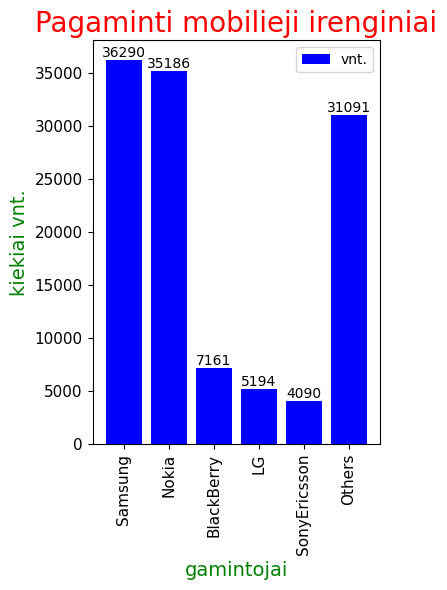

In [23]:
fig, axis = plt.subplots(figsize=(4,6))

P = axis.bar(gamintojai, kiekiai, color='blue', label='vnt.')
axis.bar_label(P)
axis.set_xlabel('gamintojai', color='green',fontsize=14)
axis.set_ylabel('kiekiai vnt.', color='green',fontsize=14)
plt.title('Pagaminti mobilieji irenginiai', fontsize=20, color='red')
axis.tick_params(axis='x', labelsize=11, rotation=90)
axis.tick_params(axis='y', labelsize=11)

axis.legend()
plt.tight_layout()
plt.show()

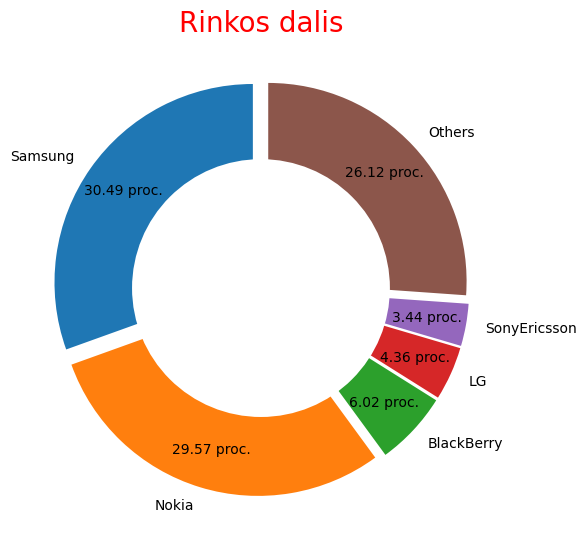

In [46]:
e = [0.1, 0, 0.1 ,0, 0.1, 0]

fig, axis = plt.subplots(figsize=(6,6))

axis.pie(dalis, 
        labels=gamintojai,
        autopct='%.2f proc.',
        textprops={'fontsize':10, 'color': 'black'},
        startangle=90,
        # move the percentage inside the arcs
        pctdistance=0.8,
        # add spaces between the arcs
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,]
        )

# hole
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Rinkos dalis', fontsize=20, color='red')
plt.tight_layout()
plt.show()

#pvz
# https://proclusacademy.com/blog/customize_matplotlib_piechart/

In [ ]:
# -- Kiek respondentų dalyvavo apklausoje 2014 bei 2018 metais iš kiekvienos amžiaus grupės?


In [3]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select Kambariai, group_concat(Plotas) as plotai from aruodas
group by Kambariai;
"""
C.execute(sql)
ans = C.fetchall()
kambariai, plotai = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       1        |33,28,34,35,13,1|
| 1 |       2        |42,42,44,37,39,4|
| 2 |       3        |55,75,83,66,88,8|
| 3 |       4        |89,78,86,73,107,|
| 4 |       5        |129,144,137,160,|
| 5 |       6        |134,135,166,232,|
| 6 |       7        |      127       |
| 7 |       8        |324,277,208,224,|
| 8 |       16       |      298       |


In [30]:
print(plotai)
print((convert_strarrs_to_floatarrs(plotai, ','))[0])

['33,28,34,35,13,17,42,20,34,18,35,18,40,37,42,36,35,25,31,26,32,25,26,30,30,36,25,26,18,33,18,34,28,33,17,44,23,34,34,18,34,26,22,29,30,38,35,33,32,26,25,33,29,34,36,18,48,34,37,27,64,22,29,33,20,36,39,39,22,38,30,29,30,30,33,38,32,36,33,25,20,19,32,20,17,33,34,18,31,32,16,22,19,28,36,28,35,37,15,31,33,37,31,20,14,18,13,30,25,26,35,32,33,21,13,21,22,26,34,40,23,29,32,30,10,39,35,35,34,28,28,14,33,42,28,33,33,40,35,37,32,25,25,34,36,28,29,25,29,31,60,48,22,28,17,32,30,28,21,35,57,35,30,35,30,18,18,35,16,18,28,34,32,24,20,25,19,12,30,18,16,17,23,26,21,21,17,23,20,14,17,18,18,12,35,36,35,32,97,36,20,19,20,20,41,22,38,23,21,35,24,28,28,12,25,25,39,40,24,35,30,32,26,39,21,40,22,35,18,18,16,16,22,26,29,26,41,22,37,33,36,37,26,36,30,18,13,28,23,19,31,21,47,36,41,7,42,29,41,27,26,51,20,32,35,10,30,30,36,33,31,29,28,39,29,46,27,37,28,34,38,50,24,41,41,49,32,37,28,15,28,38,43,39,27,27,43,25,11,18,30,20,34,33,33,18,15,33,38,40,40,30,28,28,34,18,19,29,36,28,17,18,39,52,32,32,284,24,26,68,36,93,29

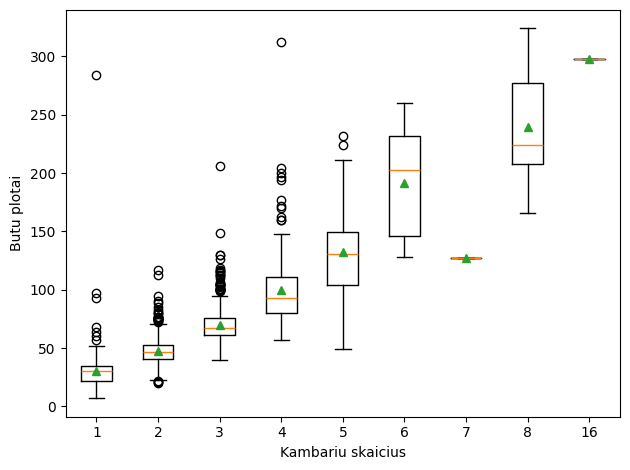

In [38]:
fig, axis = plt.subplots()

axis.boxplot(convert_strarrs_to_floatarrs(plotai, ','), showmeans=True, showfliers=True)
axis.set_xticklabels(kambariai)
axis.set_xlabel('Kambariu skaicius')
axis.set_ylabel('Butu plotai')

plt.tight_layout()
plt.show()

In [56]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select gamintojas, count(*) as kiekis,
group_concat(cast(replace(price, ' ', '') as float)) as kaina,
group_concat(cast(replace(rida, ' ', '') as float)) as rid
-- 2024-avg(cast(substring(pagaminimo_data, 1, 4) as float)) as amzius
-- cast(substring(pagaminimo_data, 1, 4) as float) as pagaminta
from autopliuslt
where rida != 'Nenurodyta' and cast(substring(pagaminimo_data, 1, 4) as float) = 2020
group by gamintojas
order by kiekis desc
limit 5;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina, ridos = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 | Mercedes-Benz  |       8        |100000,111000,17|16800,59000,1750|
| 1 |      BMW       |       5        |96499,96499,3350|31000,31000,1927|
| 2 |     Toyota     |       4        |17500,28200,3250|11250,33000,3485|
| 3 |     Nissan     |       3        |19900,19900,2459|72763,72763,1795|
| 4 |     Skoda      |       3        |19900,16150,2230|19000,57218,5950|


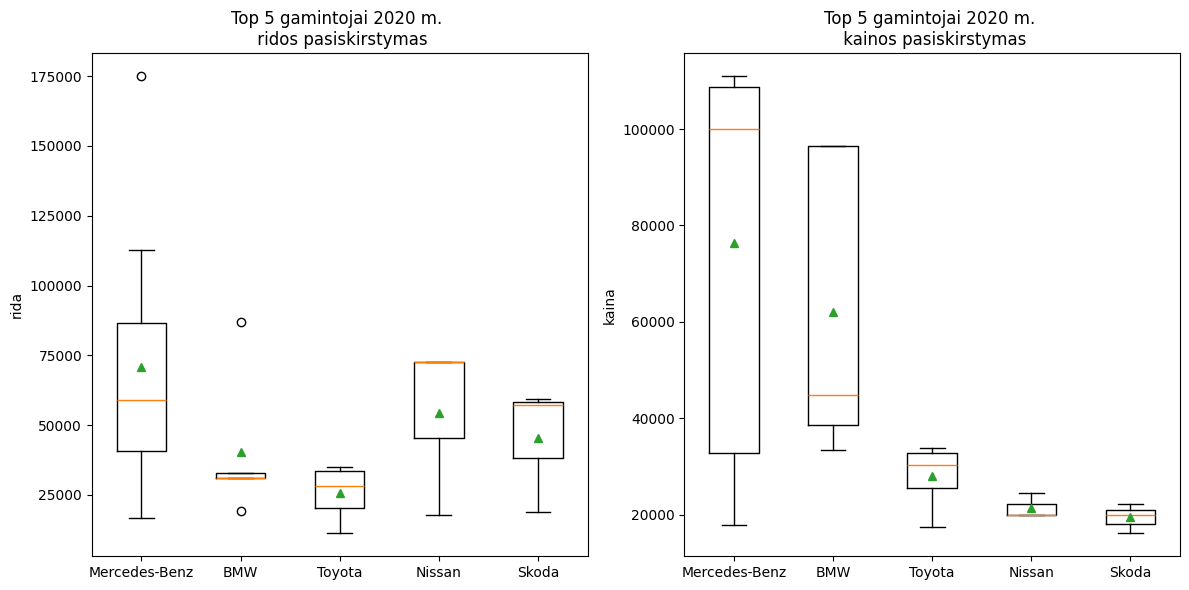

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.boxplot(convert_strarrs_to_floatarrs(ridos, ','), showmeans=True)
ax1.set_xticklabels(gamintojas)
ax1.set_ylabel('rida')
ax1.set_title('Top 5 gamintojai 2020 m. \n ridos pasiskirstymas')

ax2.boxplot(convert_strarrs_to_floatarrs(kaina, ','), showmeans=True)
ax2.set_xticklabels(gamintojas)
ax2.set_ylabel('kaina')
ax2.set_title('Top 5 gamintojai 2020 m. \n kainos pasiskirstymas')

plt.tight_layout()
plt.show()